In [1]:
# !pip install torch pytorch-lightning pytorch_forecasting

In [2]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

data = pd.read_csv('../../dataset/final/imputed_processed_data.csv')
data

,date,price,anuradhapura_producer_price,kurunegala_producer_price,polonnaruwa_producer_price,production,production_total,exchange_rate,fuel_price,m0,m2,m1,m2b
0,1996-01-01,18.07,7.75,7.900,8.18,1333.600,2065.100,53.685,12.4,77071,228090,73783,260481
1,1996-02-01,18.70,8.17,8.260,8.76,1333.600,2065.100,53.685,12.4,79586,234199,77440,269496
2,1996-03-01,18.49,7.95,7.850,7.99,1333.600,2065.100,53.685,12.4,82915,239178,81796,272552
3,1996-04-01,18.52,8.25,8.010,8.29,1333.600,2065.100,54.735,12.4,80873,241893,79478,278425
4,1996-05-01,19.02,8.38,8.500,8.34,731.500,2065.100,54.950,12.4,83410,242072,76620,277365
...,...,...,...,...,...,...,...,...,...,...,...,...,...
319,2022-08-01,239.24,112.60,113.863,122.93,1461.675,3392.875,357.880,430.0,1386248,10285938,1534114,11986911
320,2022-09-01,228.44,110.50,108.008,117.00,1461.675,3392.875,365.500,430.0,1378579,10351444,1528595,12051480
321,2022-10-01,224.78,105.48,106.740,109.50,1931.200,3392.875,363.000,430.0,1341681,10338384,1456688,12045719
322,2022-11-01,222.28,98.40,101.900,103.48,1931.200,3392.875,368.500,430.0,1318493,10416961,1457977,12162934


In [3]:
from temporal_fusion_transformer import TFT

tft_model = TFT(data)

In [4]:
def classify_yaha_mala(row):
    month = row['month']
    
    if month >= 10 or month <= 4:
        return 'maha'
    else:
        return 'yala'

In [5]:
tft_model.preprocess_data( ['price', 'anuradhapura_producer_price', 'kurunegala_producer_price', 'polonnaruwa_producer_price', 'exchange_rate', 'fuel_price'], classify_yaha_mala)

In [6]:
tft_model.create_ts_dataset()
tft_model.create_dataloaders()

Global seed set to 42
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Number of parameters in network: 8.6k


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.17782794100389226
Restoring states from the checkpoint path at C:\Users\luqma\OneDrive\Pictures\SriOryzaugur\model\model_selection\temporal_fusion_transformer\.lr_find_20982599-f7ba-4a8d-b8e8-e58b002880ef.ckpt
Restored all states from the checkpoint at C:\Users\luqma\OneDrive\Pictures\SriOryzaugur\model\model_selection\temporal_fusion_transformer\.lr_find_20982599-f7ba-4a8d-b8e8-e58b002880ef.ckpt


suggested learning rate: 0.17782794100389226


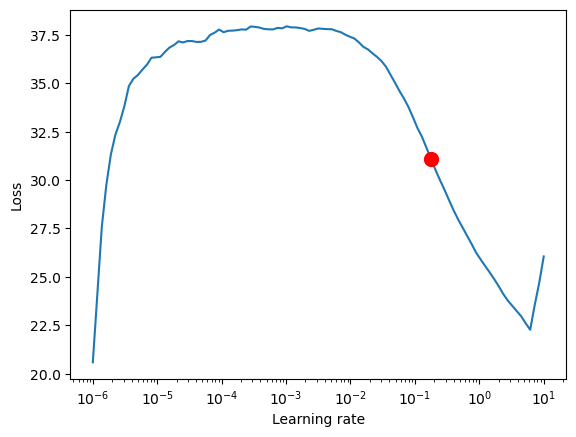

In [7]:
tft_model.optimize_lr(plot_lr=True)

In [8]:
tft_model.learning_rate

0.17782794100389226

In [9]:
tft_model.optimize_hyperparameters(n_trials=1, max_epochs=3, use_learning_rate_finder=False)

[I 2023-05-04 01:11:19,996] A new study created in memory with name: no-name-0f79b048-44f8-49a4-a454-381cce829dd9
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
`Trainer.fit` stopped: `max_epochs=3` reached.
[I 2023-05-04 01:11:41,372] Trial 0 finished with value: 146.8652801513672 and parameters: {'gradient_clip_val': 0.161384370430434, 'hidden_size': 8, 'dropout': 0.1767454184289144, 'hidden_continuous_size': 8, 'attention_head_size': 1, 'learning_rate': 0.007777182196758347}. Best is trial 0 with value: 146.8652801513672.


In [10]:
tft_model.configure_network_and_trainer(max_epochs=5)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Number of parameters in network: 8.6k


In [11]:
tft_model.fit_network()

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=5` reached.


In [12]:
tft_model.calculate_baseline_error()

In [13]:
model_results = tft_model.evaluate()
forecasts = model_results[0]
forecasted_dates = model_results[1]
metrics = model_results[2]

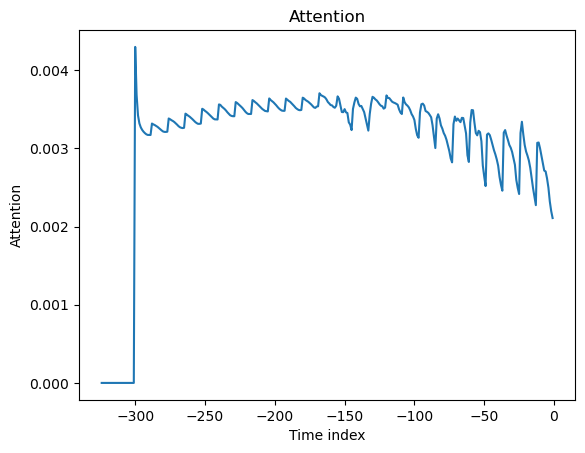

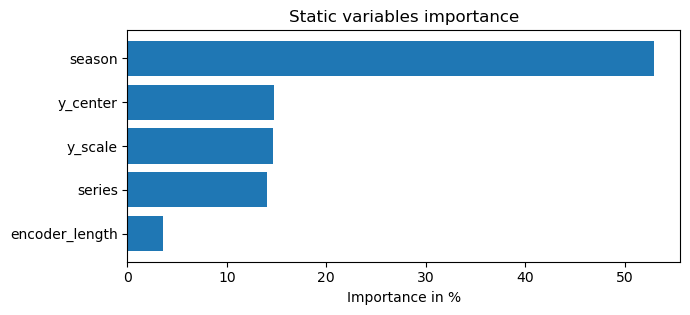

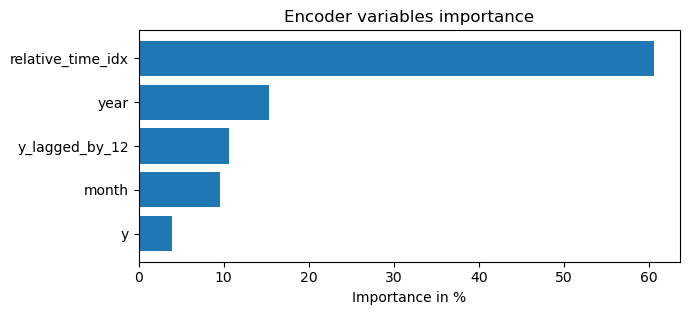

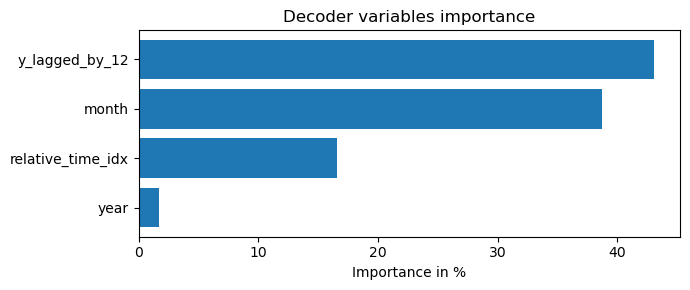

In [15]:
tft_model.interpret_model()

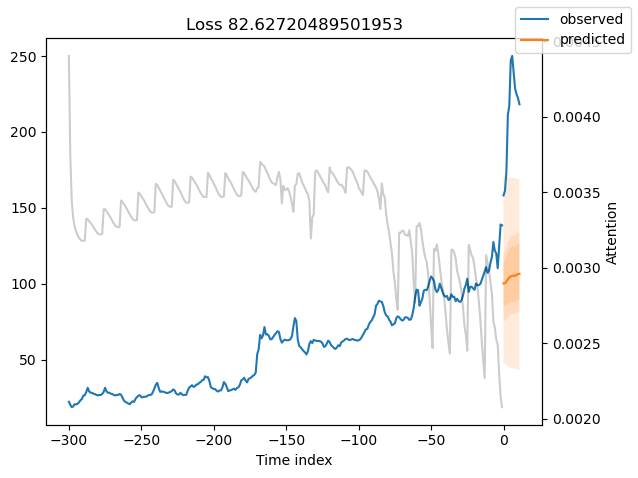

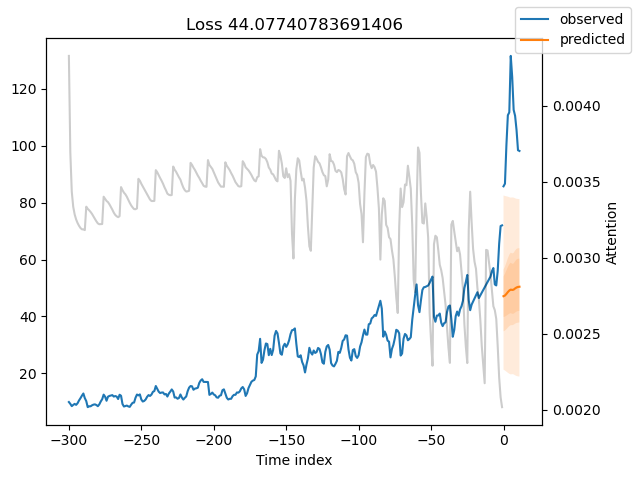

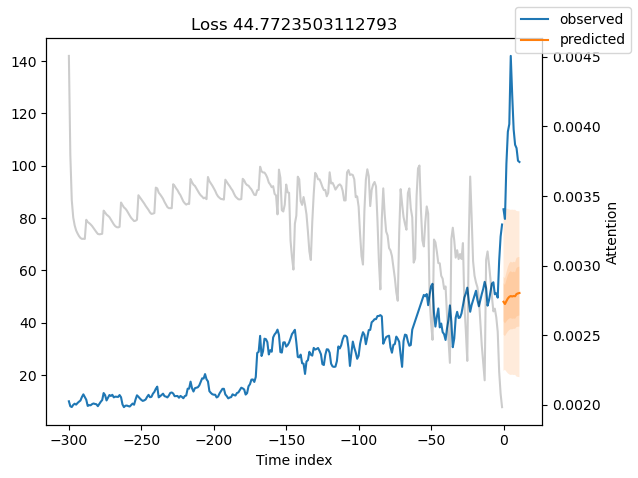

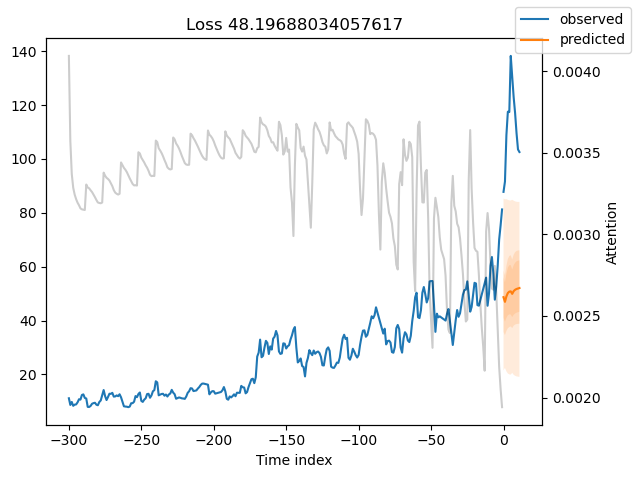

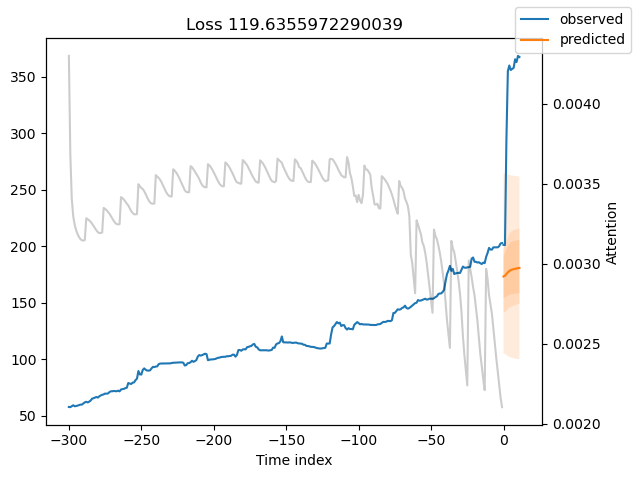

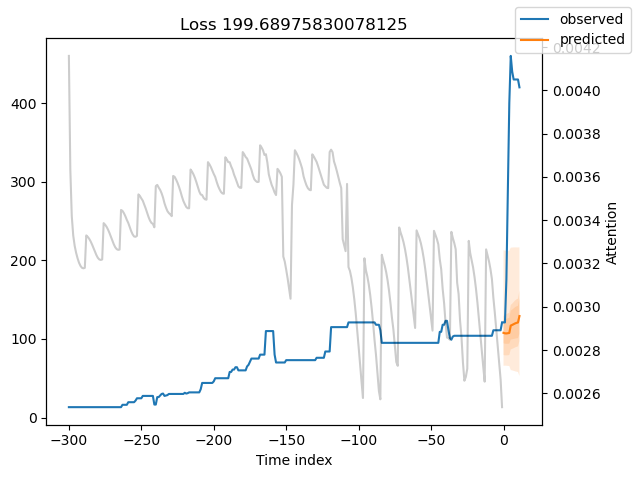

In [16]:
tft_model.plot_forecasts(True)

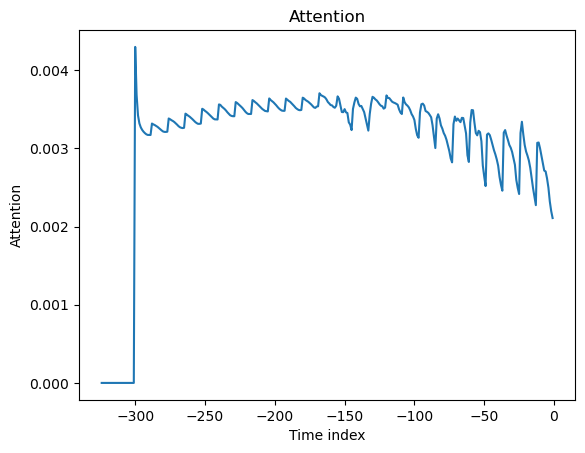

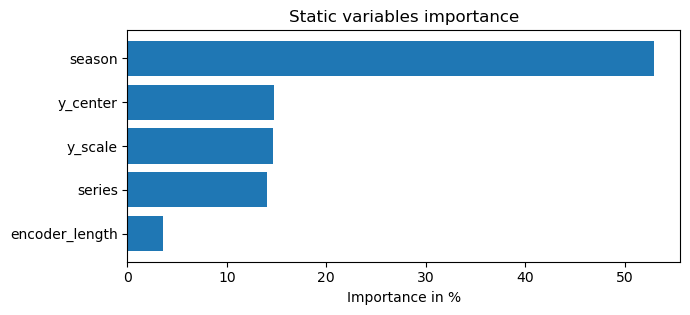

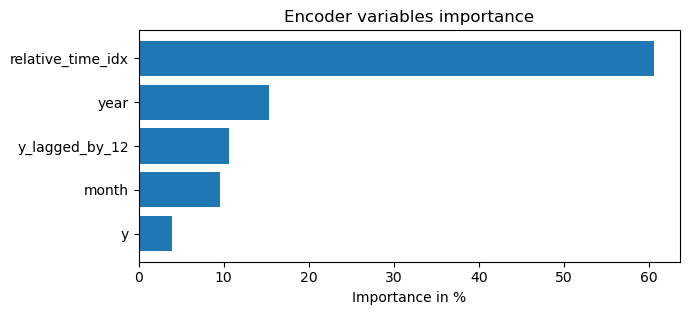

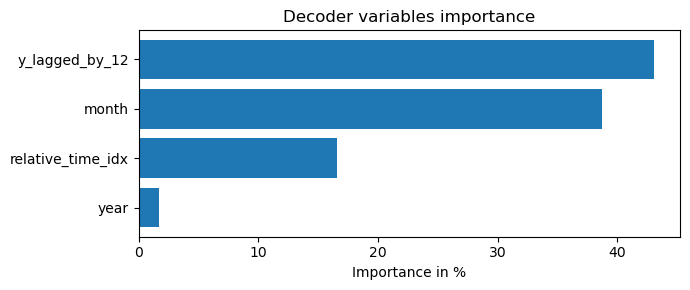

In [17]:
tft_model.interpret_model()